# PS 07

## Name: Xinyu Chang

---

In [63]:
# import the packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

## 1 Prepare data

#### 1. Load data. The data should contain 303 rows, and 11 columns

In [64]:
heart = pd.read_csv("heart.csv.bz2", sep=',')
heart_df = heart.drop(columns=['slp', 'oldpeak', 'thall'])
heart_df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,caa,output
0,63,1,3,145,233,1,0,150,0,0,1
1,37,1,2,130,250,0,1,187,0,0,1
2,41,0,1,130,204,0,0,172,0,0,1
3,56,1,1,120,236,0,1,178,0,0,1
4,57,0,0,120,354,0,1,163,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0,0
299,45,1,3,110,264,0,1,132,0,0,0
300,68,1,0,144,193,1,1,141,0,2,0
301,57,1,0,130,131,0,1,115,1,1,0


In [65]:
heart_df.shape

(303, 11)

There are 303 rows and 11 coulumns in the dataset.

#### 2. Do some basic checks. 
#### a. Do we have any missing values? 

In [66]:
heart_df.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
caa         0
output      0
dtype: int64

There are no missing values.

#### b. What are the data types? 

In [67]:
heart_df.dtypes

age         int64
sex         int64
cp          int64
trtbps      int64
chol        int64
fbs         int64
restecg     int64
thalachh    int64
exng        int64
caa         int64
output      int64
dtype: object

The data type is "int64" for all columns.

#### c. What are ranges of numeric variables, and possible values of categorical variables? 

In [68]:
heart_df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,caa,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,0.729373,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.022606,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,4.000000,1.000000


**Numeric variables:**  
age: 29 - 77 years  
trtbps: 94 - 200 mm Hg  
chol: 126 - 564 mg/dl  
thalachh: 71 - 202 (maximum heart rate achieved)  

**Categorical variables:**  
sex: {0, 1} (0 = female; 1 = male)  
cp: {0, 1, 2, 3} (chest pain type)  
fbs: {0, 1} (fasting blood sugar > 120 mg/dl, 1 = true; 0 = false)  
restecg: {0, 1, 2} (resting electrocardiographic results)  
exng: {0, 1} (exercise induced angina, 1 = yes; 0 = no)  
caa: {0, 1, 2, 3, 4} (number of major vessels)  
output: {0, 1} (0: did not have a heart attack, 1: had a heart attack)  


#### d. What is the percentage of heart attack among these patients?

In [69]:
heart_attack_per = heart_df['output'].mean() * 100
heart_attack_per

54.45544554455446

The percentage of the heart attck among these patients is 54.46%.

#### e.Compare the values with the documentation and comment what do you see.

In [70]:
heart_df.cp.value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

Compared with the documentation, the values I got are different. The documentation contains the chest pain type (1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic). However, I got the value for (0: 143; 1: 50; 2: 87; 3: 23, not include the 4.)

In [71]:
heart_df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

Compared with the documentation, the values I got are the same one. The documentation contains the sex of the patient (1 = male; 0 = female), which is the same as I got(1: 207; 0: 96).

In [72]:
heart_df.fbs.value_counts()

0    258
1     45
Name: fbs, dtype: int64

Compared with the documentation, the values I got are the same one. The documentation contains (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false), which is the same as I got(0 :258; 1: 45).

In [73]:
heart_df.restecg.value_counts()

1    152
0    147
2      4
Name: restecg, dtype: int64

Compared with the documentation, the values I got are the same one. The documentation contains resting electrocardiographic results. 0: normal; 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV); 2: showing probable or definite left ventricular hypertrophy by Estes’ criteria, which is the same as I got(0 : 147; 1: 152; 2: 4).

In [74]:
heart_df.exng.value_counts()

0    204
1     99
Name: exng, dtype: int64

Compared with the documentation, the values I got are the same one. The documentation contains exercise induced angina (1 = yes; 0 = no), which is the same as I got(0 : 204; 1: 99).

In [75]:
heart_df.caa.value_counts()

0    175
1     65
2     38
3     20
4      5
Name: caa, dtype: int64

Compared with the documentation, the values I got are the different one. The documentation contains number of major vessels (0-3), while I got (0 : 175; 1: 65; 2: 38; 3: 20; 4:5).

In [76]:
heart_df.output.value_counts()

1    165
0    138
Name: output, dtype: int64

Compared with the documentation, the values I got are the same one. The documentation contains (0: did not have a heart attack, 1: had a heart attack), which is the same as I got(0 : 138; 1: 165).

#### 3.You probably noticed that all the above variables are coded as numbers. However, not all of these are in fact of numeric (interval, ratio) measure type. Which variables above are inherently non numeric (nominal or ordinal)?

**Nominal Variables: These variables are categorical with no inherent order or priority.**

sex: This is a binary categorical variable, where 1 represents male and 0 represents female. There's no order between male and female. 

fbs: This is also a binary categorical variable, representing whether fasting blood sugar is > 120 mg/dl (1 = true; 0 = false).  

exng: Another binary categorical variable indicating the presence of exercise-induced angina (1 = yes; 0 = no).  

output: The output variable is binary, where 1 indicates a person had a heart attack and 0 indicates they did not.  

**Ordinal Variables: These variables are categorical but have an inherent order.**  

cp: Chest pain type is an ordinal variable, where the types of chest pain are ordered as 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic.  

restecg: Resting electrocardiographic results can also be seen as ordinal, as the values progress from normal to probable or definite left ventricular hypertrophy.  

caa: The number of major vessels (0-3) can be seen as ordinal. Although it's coded numerically, the numbers represent categories that have an inherent order (more vessels could indicate a higher risk).  

#### 4. Construct the outcome vector y and the design matrix X. It should include all explanatory variable (but not output!). The variables that are inherently categorical should be converted to categorical. How many columns do you get?

In [77]:
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'caa']
for col in categorical_cols:
    heart_df[col] = heart_df[col].astype('str')

In [78]:
heart_df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,caa,output
0,63,1,3,145,233,1,0,150,0,0,1
1,37,1,2,130,250,0,1,187,0,0,1
2,41,0,1,130,204,0,0,172,0,0,1
3,56,1,1,120,236,0,1,178,0,0,1
4,57,0,0,120,354,0,1,163,1,0,1


In [79]:
heart_df.dtypes

age          int64
sex         object
cp          object
trtbps       int64
chol         int64
fbs         object
restecg     object
thalachh     int64
exng        object
caa         object
output       int64
dtype: object

In [80]:
X = heart_df[['cp', 'fbs', 'restecg', 'exng', 'age', 'sex', 'trtbps', 'chol', 'thalachh', 'caa']]

In [81]:
y = heart_df['output']

In [82]:
X = pd.get_dummies(X, drop_first=True)
X.shape[1]

16

There are 16 columns I get.

In [83]:
X.head()

,age,trtbps,chol,thalachh,cp_1,cp_2,cp_3,fbs_1,restecg_1,restecg_2,exng_1,sex_1,caa_1,caa_2,caa_3,caa_4
0,63,145,233,150,0,0,1,1,0,0,0,1,0,0,0,0
1,37,130,250,187,0,1,0,0,1,0,0,1,0,0,0,0
2,41,130,204,172,1,0,0,0,0,0,0,0,0,0,0,0
3,56,120,236,178,1,0,0,0,1,0,0,1,0,0,0,0
4,57,120,354,163,0,0,0,0,1,0,1,0,0,0,0,0


#### 5. Split data (both y and X) into work and testing chunks (80/20). Do not look at the testing chunk.

In [84]:
X_work, X_test, y_work, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

In [85]:
X_work.shape[0], X_test.shape[0]
X_work.head()

,age,trtbps,chol,thalachh,cp_1,cp_2,cp_3,fbs_1,restecg_1,restecg_2,exng_1,sex_1,caa_1,caa_2,caa_3,caa_4
134,41,126,306,163,1,0,0,0,1,0,0,0,0,0,0,0
273,58,100,234,156,0,0,0,0,1,0,0,1,1,0,0,0
268,54,122,286,116,0,0,0,0,0,0,1,1,0,1,0,0
201,60,125,258,141,0,0,0,0,0,0,1,1,1,0,0,0
213,61,145,307,146,0,0,0,0,0,0,1,0,0,0,0,0


#### 6. Save your test data (both y and X to a file to be used later. Delete all datasets that contain the testing data from memory. This includes the original data frame, X, and y, and the test data itself.

In [86]:
X_test.to_csv('X_test.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

In [87]:
del X, y, X_test, y_test, heart_df

#### 7. Split your work data into training and validation chunks (80/20).

In [88]:
X_train, X_val, y_train, y_val = train_test_split(X_work, y_work, test_size=0.2, random_state=50)

In [89]:
X_train.shape[0], X_val.shape[0]
X_train.head()

,age,trtbps,chol,thalachh,cp_1,cp_2,cp_3,fbs_1,restecg_1,restecg_2,exng_1,sex_1,caa_1,caa_2,caa_3,caa_4
101,59,178,270,145,0,0,1,0,0,0,0,1,0,0,0,0
188,50,140,233,163,0,1,0,0,1,0,0,1,1,0,0,0
210,57,128,229,150,0,1,0,0,0,0,0,1,1,0,0,0
242,64,145,212,132,0,0,0,0,0,0,0,1,0,1,0,0
83,52,152,298,178,0,0,1,1,1,0,0,1,0,0,0,0


## 2 Logistic regression

#### 1. What do you think, which measure–precision, recall, or F-score–will be most relevant in order to make this model more applicable in medicine? Explain! Below, you will compare models based on both accuracy and the measure you suggest here.

When applying machine learning models to the field of medicine, particularly for critical conditions like heart attacks, we want to ensure the model catches as many true positive cases as possible, because a false negative (a patient having a heart attack, but the model says they are not) could potentially lead to loss of life. However, if we only focus on recall, a naive model might predict every case as positive, which will yield perfect recall but is practically useless, since it would also mean a lot of false positives (patients diagnosed with a heart attack, when they are not actually having one). False positives can lead to unnecessary treatments, increased healthcare costs, and psychological stress for patients.

So we need to strike a balance between detecting true positives (high recall) and avoiding false positives (high precision). This is where the F-score becomes relevant. The F-score is the harmonic mean of precision and recall, providing a balance between the two. It penalizes extreme values, so a model with high recall but low precision, or vice versa, would get a low F-score.

#### 2. First, imagine we create a very simple model (“naive model”) that predicts everyone the same result (attack or no attack), whichever category is more common in data (the majority category).How would the confusion matrix of this model look like? What are the corresponding accuracy, precision and recall? Show this confusion matrix and explain!Note: you should not fit any model here, you are able to compute these all these values manually with just a calculator!

In [90]:
y_work.value_counts()

1    134
0    108
Name: output, dtype: int64

| || |
| -------- | ------------: | ------:|
|| Predict no heart attack | Predict heart attack |
| Actual no heart attack | 0 | 108 |
| Actual heart attack | 0 | 134 |

This matrix suggests that the naive model always predicts a heart attack, as that is the majority category.

Here's what the different terms mean:

True Positives (TP): These are cases in which we predicted yes (heart attack), and the actual was also yes (heart attack).  
True Negatives (TN): We predicted no, and the actual was no.  
False Positives (FP): We predicted yes, but the actual was no. Also known as "Type I error."  
False Negatives (FN): We predicted no, but the actual was yes. Also known as "Type II error."  
Given the confusion matrix, the quantities are:

TP = 134 (We predicted heart attack and it was a heart attack)  
TN = 0 (We predicted no heart attack and there were no heart attack)  
FP = 108 (We predicted heart attack but there were no heart attack)  
FN = 0 (We predicted no heart attack but it was a heart attack)  


The model never correctly predicts "no attack" because it always predicts "attack".The model incorrectly predicts "attack" for all patients who don't have a heart attack, leading to a large number of false alarms.The model correctly identifies all actual heart attack cases because it always predicts "attack", but this is not very useful because it doesn't differentiate between patients who are at risk and those who aren't.

**Accuracy = TP / (TP + FN + FP + TN) = 134 / (134 + 0 + 108 + 0) ≈ 0.55  
Precision = TP / (TP + FP) = 134 / (134 + 108) ≈  0.55  
Recall = TP / (TP + FN) = 134 / (134 + 0) = 1      
F-score = 2 / (1 / Precision) +(1 / Recall) ≈ 0.7128**    


Accuracy represents how often the model's predictions are correct. In this case, it means that about 55% of the time, the model correctly identifies whether a patient will have a heart attack. Precision tells us how reliable the model's positive predictions are. In this context, if the model predicts a patient is going to have a heart attack, it's correct approximately 55% of the time. Recall measures how well the model identifies actual positive cases. A recall of 1 means that the model identifies 100% of patients who will have a heart attack. The F1 score is 0.7128, which is higher than both the accuracy and precision. It indicates that despite a rather low accuracy and precision, the model is doing a fairly good job at balancing precision and recall.

#### 3.  Construct a logistic regression model in sklearn and fit it with your training data

In [91]:
m1 = LogisticRegression(max_iter=1000)
m1.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

#### 4.  Use your validation data to predict the outcome—that is, whether someone has heart attack or not. Print out the first 10 labels. Which values denote attack, which ones non-attack?

In [92]:
predict = m1.predict(X_val)
predict[:10]

array([0, 1, 0, 1, 1, 1, 1, 1, 0, 1])

In the case of a binary logistic regression, 0 usually denotes 'no heart attack' and 1 denotes 'heart attack'

#### 5. Display the confusion matrix.

In [93]:
cm = confusion_matrix(y_val, predict)
cm

array([[17,  5],
       [ 2, 25]])

#### 6.Compute and display accuracy and the measure you suggested in 1. How do these results compare to the naive model?

In [94]:
accuracy = accuracy_score(y_val, predict)
accuracy

0.8571428571428571

In [95]:
f_score = f1_score(y_val, predict)
f_score

0.8771929824561403

Accuracy: The logistic regression model has an accuracy of about 0.8571, which is significantly higher than the naive model's accuracy of about 0.55. This shows that the logistic regression model correctly identifies a greater proportion of cases, considering both attacks and non-attacks.

F - score:The logistic model's F1 score is about 0.877, which indicates a strong balance between precision and recall. Again, this is an improvement over the naive model's F1 score of 0.7128.

## 3 Other ML methods

### 3.1 Nearest Neighbors

#### 1. Loop over different number of neighbors k (from a single neighbor to all data points). For each k value:
#### • train the model on training data and
#### • compute the performance (accuracy and your suggested measure) on training data
#### • compute the performance (accuracy and your suggested measure) on validation data
#### • store the performance value(s)

In [96]:
train_accuracy_values = []
train_f1_values = []
val_accuracy_values = []
val_f1_values = []

for k in range(1, len(X_train)+1):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    train_pred = knn.predict(X_train)
    train_accuracy = accuracy_score(y_train, train_pred)
    train_f1 = f1_score(y_train, train_pred)
    train_accuracy_values.append(train_accuracy)
    train_f1_values.append(train_f1)

    val_pred = knn.predict(X_val)
    val_accuracy = accuracy_score(y_val, val_pred)
    val_f1 = f1_score(y_val, val_pred)
    val_accuracy_values.append(val_accuracy)
    val_f1_values.append(val_f1)

#### 2. Make a plot where you show both the training and validation performance as a function of k.

In [97]:
k_values = range(1, len(X_train)+1)

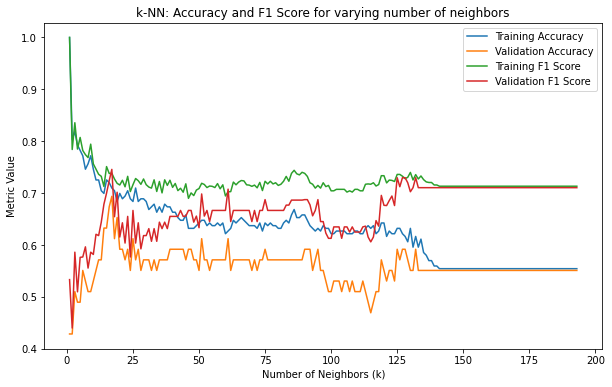

In [98]:
_ = plt.figure(figsize=(10, 6))
_ = plt.plot(k_values, train_accuracy_values, label='Training Accuracy')
_ = plt.plot(k_values, val_accuracy_values, label='Validation Accuracy')
_ = plt.plot(k_values, train_f1_values, label='Training F1 Score')
_ = plt.plot(k_values, val_f1_values, label='Validation F1 Score')
_ = plt.xlabel('Number of Neighbors (k)')
_ = plt.ylabel('Metric Value')
_ = plt.title('k-NN: Accuracy and F1 Score for varying number of neighbors')
_ = plt.legend()
_ = plt.show()

#### 3. Find the k value that gives you the best performance (both accuracy and your suggested measure).How good measures do you get? How do they compare with the naive model? How do they compare with logistic regression?

In [99]:
best_k_acc = val_accuracy_values.index(max(val_accuracy_values)) + 1
best_k_acc

17

In [100]:
best_k_f1 = val_f1_values.index(max(val_f1_values)) + 1
best_k_f1

17

In [101]:
print("Best accuracy: ", val_accuracy_values[best_k_acc - 1])
print("Best F1 score: ", val_f1_values[best_k_f1 - 1])

Best accuracy:  0.6938775510204082
Best F1 score:  0.7457627118644067


The k value that gives me the best performance are 17(for accuracy score) and 17(for F-score) respectively. I got the best score is 69.39% for the accuracy score and 74.58% for the F1 score. Compared with the naive model, the accuracy score(69.39%) I got in the KNN model is higher than that of in the naive model(55%) and the F1 score I got in the naive model(71.28%) is lower than that of in KNN model(with 74.58%). 

Compared with the logistic regression model, the accuracy score(69.39%) I got in the KNN model is lower than that of in the logistic regression model(85.71%) and the F1 score of the KNN model(74.58%) is also lower than that of in the logistic regression model (with 87.72%). 

#### 4.Which k values (if any) are overfitting, which ones underfitting? Why do the model performance measure flatten out when k is very large?

From the combined graph of accuracy and F1 score, it's evident that the optimal number of neighbors (k) is 17 for both metrics. When k is less than 17, overfitting occurs, indicated by high performance on the training data and poor performance on validation data, implying a failure to generalize well to unseen data. However, as k increases to between 17 and 140, the model exhibits a decrease in overfitting. The training and validation performances become more similar, even though the training performance remains slightly higher, suggesting a mild overfitting situation. When k exceeds 140, both the training and validation performances follow a similar trend, and the accuracy is lower than the accuracy before k = 140 which is indicative of underfitting. This suggests that the model lacks complexity or capacity to capture the patterns in the data, leading to poor performance both during training and on unseen data.

As the value of k increases, the decision boundary (in case of a k-Nearest Neighbors model, for example) becomes smoother and less flexible. The model starts considering more points in the prediction and becomes less sensitive to the noise in individual data points. This can lead to better generalization on unseen data, improving validation performance.However, after a certain point, increasing k may lead the model to become too generalized. It starts taking into account points that are too far away and less similar to the prediction point, which can reduce its ability to capture the underlying pattern in the data. When k is very large, the model essentially considers all points in the dataset for each prediction, which means the prediction becomes constant and does not depend on the input, leading to a flat performance measure. 

### 3.2 Decision trees

#### 1.Loop over different values of max depth, from 1 to 10. For each max depth value:
#### • train the model on training data and . . .
#### • . . . compute the performance (accuracy and your suggested measure) on training data
#### • compute the performance (accuracy and your suggested measure) on validation data
#### • store the performance value(s) in a list or arrya

In [102]:
train_accuracy_values = []
val_accuracy_values = []
train_f1_values = []
val_f1_values = []

for depth in range(1, 11):
    dt = DecisionTreeClassifier(max_depth=depth, random_state=0)
    dt.fit(X_train, y_train)
    
    train_pred = dt.predict(X_train)
    train_accuracy = accuracy_score(y_train, train_pred)
    train_f1 = f1_score(y_train, train_pred)
    
    val_pred = dt.predict(X_val)
    val_accuracy = accuracy_score(y_val, val_pred)
    val_f1 = f1_score(y_val, val_pred)
    
    train_accuracy_values.append(train_accuracy)
    val_accuracy_values.append(val_accuracy)
    train_f1_values.append(train_f1)
    val_f1_values.append(val_f1)

#### 2. Make a plot where you show both the training and validation performance as a function of k

In [103]:
depth_values = list(range(1, 11))

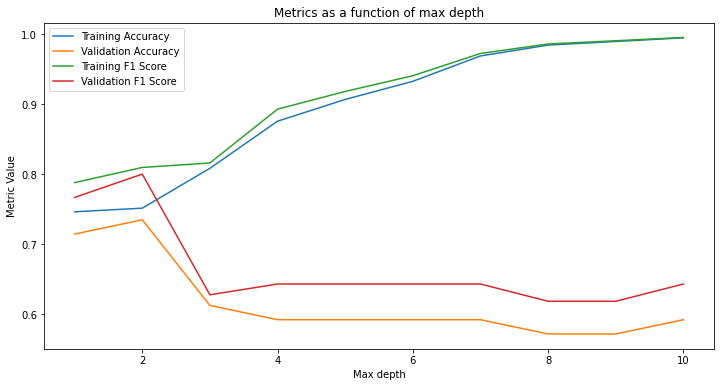

In [105]:
_ = plt.figure(figsize=(12, 6))
_ = plt.plot(depth_values, train_accuracy_values, label='Training Accuracy')
_ = plt.plot(depth_values, val_accuracy_values, label='Validation Accuracy')
_ = plt.plot(depth_values, train_f1_values, label='Training F1 Score')
_ = plt.plot(depth_values, val_f1_values, label='Validation F1 Score')
_ = plt.xlabel('Max depth')
_ = plt.ylabel('Metric Value')
_ = plt.title('Metrics as a function of max depth')
_ = plt.legend()
_ = plt.show()

#### 3. Find the k value that gives you the best performance (both accuracy and your suggested measure).How good measures do you get? How do they compare with the naive model? How do they compare with logistic regression?

In [106]:
best_depth_acc = val_accuracy_values.index(max(val_accuracy_values)) + 1
best_depth_acc

2

In [107]:
best_depth_f1 = val_f1_values.index(max(val_f1_values)) + 1
best_depth_f1

2

In [108]:
max(val_accuracy_values)

0.7346938775510204

In [109]:
max(val_f1_values)

0.7999999999999999

The k value that gives me the best performance are 2(accuracy score) and 2(F-score) respectively. I got the best score is 73.47% for the accuracy score and 80% for the F1 score. Compared with the naive model, the accuracy score (73.47%) I got in the decision tree model is higher than that of in the naive model(55%).The F1 score is higher than that of in naive model(71.28%).Compared with the logistic regression model, the accuracy score I got in the decision tree model(73.47%) is smaller than that of in logistic regression model(85.71%) and the F1 score of the decision tree model(80%) is also smaller than that of in logistic regression model(with 87.72%).

#### 4. Which k values (if any) are overfitting, which ones underfitting?

From the plot, we can see that the training accuracy and training F score is almost always higher than the validation score, but at the point where the tree has a max depth of 2 and 3, the difference between the training accuracy and F score and validation accuracy and F score begin to get very large. The validation accuracy and validation F score are decreasing but the training accuracy and F score are increasing. So I might say moving over 2,3 max depth it shows an apparent overfitting phenomenon. However, there are some places that the accuracy and F-score graph might hard to distinguish, which is hard to figure out which one is overfitting or underfitting. This could be due to the model learning the noise and outliers in the training data rather than the underlying pattern, making it perform poorly on unseen data.

#### 5. Out of the models you tried–logistic, k-NN, and trees–which is the best model in terms of validation accuracy? How much was the accuracy over what the naive model gave you?

Based on the validation accuracy scores, the best model among logistic regression, k-NN, and decision trees is the logistic regression model with an accuracy of 0.8571.

In this case, the logistic regression model shows an accuracy improvement of approximately 0.3071 over the naive model.      
(accuracy_improvement = logistic_accuracy - naive_accuracy = 0.8571 - 0.55 = 0.3071)

## 4 How confident are we in the results?

#### 1. Predict the probability of having a heart attack Pr(output = 1|x) for everyone in data. Print out the first 10 probabilities. Note: print only probability for heart attack, not probability of non–heart attack!

In [110]:
probabilities = m1.predict_proba(X_val)[:, 1]
print(probabilities[:10])

[0.26730149 0.52952177 0.22258646 0.84586159 0.93322552 0.55377932
 0.86102685 0.86939687 0.3325201  0.71420138]


#### 2. make a histogram of your predictions. What do you see–are the predicted probabilities more extreme (either 0 or 1) or in the middle (around 0.5)?

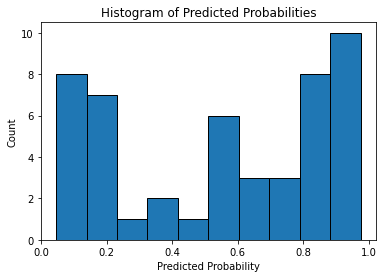

In [111]:
plt.hist(probabilities, bins=10, edgecolor='black')
plt.xlabel('Predicted Probability')
plt.ylabel('Count')
plt.title('Histogram of Predicted Probabilities')
plt.show()

We can see that the predicted probabilities are more extreme(most count with the predicted probabilities of 0.0-0.2 and 0.8-1.0), and we can see two distinct peaks in my histogram, each at these values. However, I would not say the "model" is confident. There is a number of cases where near 0.5-0.6. A peak at 1 represents cases where the model is very confident that a heart attack will occur. A peak at 0.5 represents cases where the model is unsure whether a heart attack will occur or not. There are a bunch of cases where the model is not really confident.

#### 3. Why does predicted probability around 0.5 indicate that the results are uncertain?

In logistic regression, the predicted probability is the model's estimate of the likelihood of an observation belonging to a particular class (in this case, the probability of having a heart attack). The model assigns a probability value between 0 and 1 for each observation.

If the predicted probability is around 0.5, it indicates that the model is unsure or less certain about the classification. A probability of 0.5 implies that the model considers both classes to be equally likely for the given observation. This could be due to the presence of features or patterns in the data that make it challenging for the model to confidently assign a class.

In summary, when the predicted probabilities are centered around 0.5, it suggests uncertainty in the model's classification decision, indicating that the results are less certain or more ambiguous.

## 5 Final model goodness

#### 1. Take your best model, the one you used in Question 4. But now fit it with complete work data, not just with your training data.

In [112]:
m1 = LogisticRegression(max_iter=1000)

In [113]:
m1.fit(X_work, y_work)

LogisticRegression(max_iter=1000)

#### 2. Load your test data, the one you saved earlier. Use the test data to compute test accuracy. This is your final model performance measure. Show it!

In [114]:
X_test = pd.read_csv('X_test.csv')
y_test = pd.read_csv('y_test.csv')

In [115]:
y_pred = m1.predict(X_test)
y_pred

array([0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1])

In [116]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8360655737704918

The test accuracy I got is 0.8361 here.

### I spent almost 12 hours in this problem set.